# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [1]:
# Import Dependencies
import sys
import platform

import pandas as pd
import numpy as np
from pathlib import Path

import sklearn as sk
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras
# Import Sequential and Dense from Tensorflow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 

import matplotlib.pyplot as plt
%matplotlib inline
gpu = len(tf.config.list_physical_devices('GPU'))>0

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Report Technologies
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-12.6-arm64-arm-64bit
Tensor Flow Version: 2.10.0
Keras Version: 2.10.0

Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:01:00) 
[Clang 13.0.1 ]
Pandas 1.5.1
Scikit-Learn 1.1.3
GPU is available


---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [3]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path('Resources/applicants_data.csv')
)

# Review the DataFrame
# confirm 'keys' and review the DataFrame
display(applicant_data_df.columns)
print('\n')
display(applicant_data_df.shape)
print('\n')
display(applicant_data_df.info())
print('\n')
display(applicant_data_df.head(3))

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

(34299, 12)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


None

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [4]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [5]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=['EIN', 'NAME'])

# Review the DataFrame
display(applicant_data_df.columns)
print('\n')
display(applicant_data_df.head(3))

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [6]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [8]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])

In [9]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)

# confirm 'keys' and review the DataFrame
display(encoded_df.columns)
print('\n')
display(encoded_df.head(3))

Index(['APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T12', 'APPLICATION_TYPE_T13',
       'APPLICATION_TYPE_T14', 'APPLICATION_TYPE_T15', 'APPLICATION_TYPE_T17',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T2', 'APPLICATION_TYPE_T25',
       'APPLICATION_TYPE_T29',
       ...
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=114)

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [10]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df = pd.concat(
    [
        applicant_data_df.drop(columns=categorical_variables), 
        encoded_df
    ], 
        axis=1
)

# confirm 'keys' and review the DataFrame
display(encoded_df.columns)
print('\n')
display(encoded_df.head(3))

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T12', 'APPLICATION_TYPE_T13', 'APPLICATION_TYPE_T14',
       'APPLICATION_TYPE_T15', 'APPLICATION_TYPE_T17', 'APPLICATION_TYPE_T19',
       ...
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M',
       'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object', length=117)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [11]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df['IS_SUCCESSFUL'] 

# Display a sample of y
display(y[:5])
display(y[-5:])

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, dtype: int64

In [12]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
# X = encoded_df.drop('IS_SUCCESSFUL', axis=1)
# X = encoded_df.drop(columns=['IS_SUCCESSFUL'])
X = encoded_df.drop(columns=('IS_SUCCESSFUL')) 

# Review the features DataFrame
display(X.sample(3))

,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
18471,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27226,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14405,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 6: Split the features and target sets into training and testing datasets.


In [13]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.1,                # 90% train : 10% test split
    random_state = SEED
)

### inspect datasets' lengths, i.e. review the split

In [14]:
# inspect the lengths of the full dataset and of split data
display(len(X))            # 34299
display(len(X_train))      # 27439
display(len(X_test))       # 6860

34299

30869

3430

### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [15]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)      # Fit only on X_train

# Scale the features data
X_train_scaled = X_scaler.transform(X_train) 
X_test_scaled = X_scaler.transform(X_test)

# Features count
display(X_train_scaled.shape)
display(X_test_scaled.shape)

(30869, 116)

(3430, 116)

---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [16]:
# Define the the number of inputs (features) to the model
# number_input_features = X_train_scaled.shape[1]
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [17]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = (number_input_features + 1) // 2 

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

58

In [18]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  (hidden_nodes_layer1 + 1) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

29

In [19]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [20]:
# Create the Sequential model instance
nn = Sequential()

Metal device set to: Apple M1 Max


2022-11-19 22:58:07.267645: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-19 22:58:07.267765: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu')
      )

In [22]:
# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, activation='relu'))

In [23]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1, activation='sigmoid'))

## Display the structure of your model using the summary function.

In [24]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                6786      
                                                                 
 dense_1 (Dense)             (None, 29)                1711      
                                                                 
 dense_2 (Dense)             (None, 1)                 30        
                                                                 
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [25]:
# Compile the Sequential model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Fit the model using 50 epochs and the training data
model = nn.fit(X_train_scaled, y_train, epochs=50,
               validation_data=(X_test, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = [tf.keras.callbacks.EarlyStopping(patience=20)]
              )

Epoch 1/20


2022-11-19 22:58:07.403588: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-19 22:58:07.604916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5811 - accuracy: 0.7145

2022-11-19 22:58:10.988751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - 4s 6ms/step - loss: 0.5811 - accuracy: 0.7145 - val_loss: 4386.1299 - val_accuracy: 0.4609
Epoch 2/20
483/483 [==============================] - 3s 6ms/step - loss: 0.5524 - accuracy: 0.7302 - val_loss: 6510.5630 - val_accuracy: 0.4609
Epoch 3/20
483/483 [==============================] - 3s 6ms/step - loss: 0.5500 - accuracy: 0.7309 - val_loss: 35180.9570 - val_accuracy: 0.4609
Epoch 4/20
483/483 [==============================] - 3s 6ms/step - loss: 0.5472 - accuracy: 0.7319 - val_loss: 16876.5977 - val_accuracy: 0.4609
Epoch 5/20
483/483 [==============================] - 3s 6ms/step - loss: 0.5459 - accuracy: 0.7316 - val_loss: 14473.2402 - val_accuracy: 0.4609
Epoch 6/20
483/483 [==============================] - 3s 6ms/step - loss: 0.5451 - accuracy: 0.7325 - val_loss: 103320.4766 - val_accuracy: 0.5391
Epoch 7/20
483/483 [==============================] - 3s 6ms/step - loss: 0.5439 - accuracy: 0.7338 - val_loss: 31733.9727 - val_accurac

### Compare train (loss) and test (val_loss) metrics and look for signs of overfitting

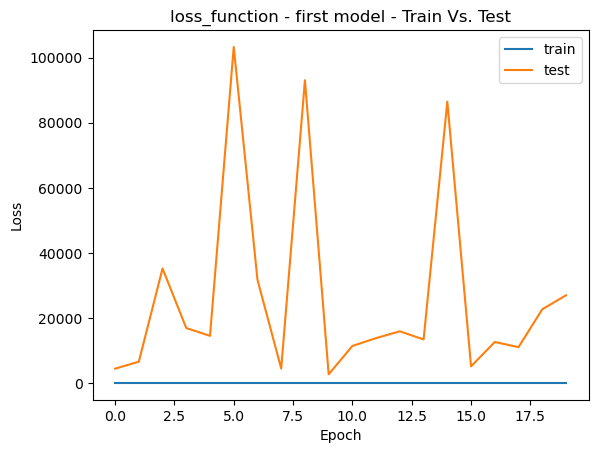

In [46]:
# Plot train vs test for first neural net
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title("loss_function - first model - Train Vs. Test")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'],loc='upper right')
plt.show()

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [29]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2022-11-19 22:59:07.160189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


108/108 - 1s - loss: 0.5518 - accuracy: 0.7318 - 528ms/epoch - 5ms/step
Loss: 0.5517562627792358, Accuracy: 0.7317784428596497


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

In [30]:
# Set the model's file path
file_path = Path('./Resources/AlphabetSoup.h5')

# Export your model to a HDF5 file
nn.save(file_path)

### Step 5: Save and export the model as JSON to a file, and name the file `AlphabetSoup1.json`. 

In [31]:
# Save model as JSON
nn_json = nn.to_json()

file_path = Path('./Resources/AlphabetSoup1.json')
with open(file_path, 'w') as json_file:
    json_file.write(nn_json)

### Save the model weights

In [32]:
# Save weights
file_path = "./Resources/model.h5"
nn.save_weights("./Resources/AlphabetSoup1.h5")

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


# Alternative Model 1
### general guideline total number of hidden neurons < 2x input features

In [35]:
# Define the the number of inputs (features) to the model
# number_input_features = X_train_scaled.shape[1]
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [36]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = 230

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

230

In [37]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [38]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [40]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim=number_input_features, activation='relu')
      )
# Add the output layer to the model specifying the number of output neurons and activation function
nn_A1.add(Dense(units=1, activation='sigmoid'))

# Display the Sequential model summary
nn_A1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 230)               26910     
                                                                 
 dense_4 (Dense)             (None, 1)                 231       
                                                                 
 dense_5 (Dense)             (None, 230)               460       
                                                                 
 dense_6 (Dense)             (None, 1)                 231       
                                                                 
Total params: 27,832
Trainable params: 27,832
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the Sequential model
nn_A1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
# Fit the model using 50 epochs and the training data
model_A1= nn_A1.fit(X_train_scaled, y_train, epochs=50,
               validation_data=(X_test, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = [tf.keras.callbacks.EarlyStopping(patience=20)]
              )

Epoch 1/50
483/483 [==============================] - 3s 7ms/step - loss: 0.5439 - accuracy: 0.7365 - val_loss: 0.9980 - val_accuracy: 0.5391
Epoch 2/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5441 - accuracy: 0.7362 - val_loss: 1.0423 - val_accuracy: 0.5391
Epoch 3/50
483/483 [==============================] - 3s 7ms/step - loss: 0.5457 - accuracy: 0.7363 - val_loss: 1.4477 - val_accuracy: 0.4609
Epoch 4/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5456 - accuracy: 0.7359 - val_loss: 1.0265 - val_accuracy: 0.5391
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5450 - accuracy: 0.7358 - val_loss: 1.4425 - val_accuracy: 0.4609
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5451 - accuracy: 0.7354 - val_loss: 0.9898 - val_accuracy: 0.5391
Epoch 7/50
483/483 [==============================] - 3s 7ms/step - loss: 0.5430 - accuracy: 0.7372 - val_loss: 1.0096 - val_accuracy: 0.5391
Epoch 

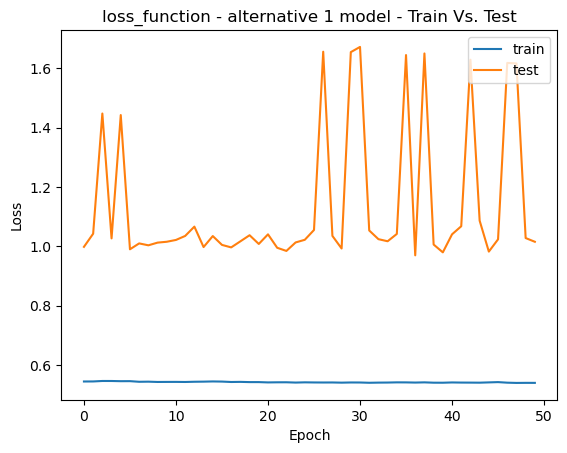

In [47]:
# Plot train vs test for first neural net
plt.plot(model_A1.history['loss'])
plt.plot(model_A1.history['val_loss'])
plt.title("loss_function - alternative 1 model - Train Vs. Test")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'],loc='upper right')
plt.show()

#### Alternative Model 2

In [49]:
# Define the the number of inputs (features) to the model
# number_input_features = X_train_scaled.shape[1]
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [50]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = 152

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2

152

In [56]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A2 = 78

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A2

78

In [57]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [58]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [59]:
# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features, activation='relu')
      )

# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn_A2.add(Dense(units=hidden_nodes_layer2_A2, activation='relu'))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_A2.add(Dense(units=1, activation='sigmoid'))

In [60]:
# Compile the Sequential model
nn_A2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
# Fit the model using 50 epochs and the training data
model_A2= nn_A2.fit(X_train_scaled, y_train, epochs=50,
               validation_data=(X_test, y_test),
               validation_split=0.3, batch_size=64, verbose=True,
               callbacks = [tf.keras.callbacks.EarlyStopping(patience=20)]
              )

Epoch 1/50
  9/483 [..............................] - ETA: 3s - loss: 0.6880 - accuracy: 0.6024  

2022-11-19 23:39:31.218001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - ETA: 0s - loss: 0.5756 - accuracy: 0.7189

2022-11-19 23:39:34.285789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


483/483 [==============================] - 3s 7ms/step - loss: 0.5756 - accuracy: 0.7189 - val_loss: 150994.3906 - val_accuracy: 0.5391
Epoch 2/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5547 - accuracy: 0.7287 - val_loss: 4525.8716 - val_accuracy: 0.4609
Epoch 3/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5500 - accuracy: 0.7308 - val_loss: 60914.6406 - val_accuracy: 0.5391
Epoch 4/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5492 - accuracy: 0.7297 - val_loss: 3899.7297 - val_accuracy: 0.4609
Epoch 5/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5462 - accuracy: 0.7338 - val_loss: 18809.5156 - val_accuracy: 0.5391
Epoch 6/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5452 - accuracy: 0.7326 - val_loss: 70550.4297 - val_accuracy: 0.5391
Epoch 7/50
483/483 [==============================] - 3s 6ms/step - loss: 0.5446 - accuracy: 0.7337 - val_loss: 39303.9727 - val_accurac

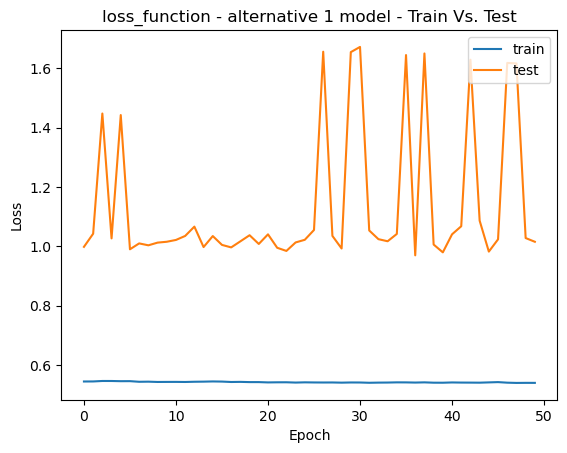

In [62]:
# Plot train vs test for first neural net
plt.plot(model_A1.history['loss'])
plt.plot(model_A1.history['val_loss'])
plt.title("loss_function - alternative 1 model - Train Vs. Test")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'],loc='upper right')
plt.show()

### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [ ]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = # YOUR CODE HERE

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy =# YOUR CODE HERE

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = # YOUR CODE HERE

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

### Step 3: Save each of your alternative models as an HDF5 file.


In [ ]:
# Set the file path for the first alternative model
file_path = # YOUR CODE HERE

# Export your model to a HDF5 file
# YOUR CODE HERE


In [ ]:
# Set the file path for the second alternative model
file_path = # YOUR CODE HERE

# Export your model to a HDF5 file
# YOUR CODE HERE


# Alternative Model X
### Non-categorical feature with extremes/outlyers, 'ASK_AMT'

In [ ]:
# Examine boxplot for feature value 'ASK_AMT'
applicant_data_df['ASK_AMT'].plot(kind = 'box')

In [ ]:
# Dropping ASK_AMT 
X_train_scaled = X_train_scaled[:, 0:-1]   # ASK_AMT is last feature
X_test_scaled = X_test_scaled[:, 0:-1]

# Checking the number of features
display(X_train_scaled.shape)
display(X_test_scaled.shape)